# Correlación entre contaminantes

Para un análisis exploratorio de los datos, se eligieron 3 estaciones de las 69 disponibles en el catálogo de Aire-Cdmx. Las estaciones en cuestión se encuentran en puntos estratégicos de la ciudad, como el norte (MGH - Miguel Hidaldo, centro (HGM - Hospital General de México) y sur (TLA - Tláhuac) de la misma.

Se calcula la correlacion entre las variables (contaminantes y meteorológicas) de los datos medidos de estas tres estaciones para el año 2018.

El objetivo es encontrar que variables tienen mejor correlación entr4e sí para poder aplicar esto a un modelo predictivo.

In [1]:
# Se importan bibliotecas necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Se importa el archivo csv con los datos usando pandas

data_18 = pd.read_csv("merge_cont_2018.csv")

In [3]:
data_18.head()

,Unnamed: 0,date,month,hour,id_station,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
0,0,2018-01-01 01:00:00,1,1,AJM,0.8,2.0,25.0,26.0,31.0,53.0,26.0,6.0,53.0,11.6,1.8,258.0,79.0
1,1,2018-01-01 01:00:00,1,1,HGM,0.8,1.0,33.0,34.0,12.0,67.0,32.0,9.0,45.0,14.0,2.2,275.0,99.0
2,2,2018-01-01 01:00:00,1,1,MGH,0.5,1.0,21.0,23.0,24.0,72.0,22.0,9.0,47.0,13.2,2.5,333.0,94.0
3,3,2018-01-01 01:00:00,1,1,SAG,0.6,2.0,21.0,23.0,25.0,80.0,45.0,8.0,36.0,15.2,2.2,10.0,125.0
4,4,2018-01-01 01:00:00,1,1,SFE,0.6,1.0,26.0,28.0,26.0,56.0,22.0,7.0,57.0,11.2,1.3,254.0,79.0


In [4]:
estaciones = ['MGH', 'HGM', 'TLA']
data_18 = data_18[(data_18.id_station.isin(estaciones))]

In [5]:
data_18.head(5)

,Unnamed: 0,date,month,hour,id_station,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
1,1,2018-01-01 01:00:00,1,1,HGM,0.8,1.0,33.0,34.0,12.0,67.0,32.0,9.0,45.0,14.0,2.2,275.0,99.0
2,2,2018-01-01 01:00:00,1,1,MGH,0.5,1.0,21.0,23.0,24.0,72.0,22.0,9.0,47.0,13.2,2.5,333.0,94.0
5,5,2018-01-01 01:00:00,1,1,TLA,0.4,2.0,28.0,30.0,16.0,70.0,36.0,9.0,47.0,12.8,3.3,323.0,106.0
8,8,2018-01-01 02:00:00,1,2,HGM,0.6,1.0,28.0,29.0,16.0,68.0,28.0,10.0,46.0,13.2,2.7,264.0,96.0
9,9,2018-01-01 02:00:00,1,2,MGH,0.3,1.0,15.0,16.0,29.0,70.0,21.0,8.0,49.0,12.6,2.5,335.0,91.0


In [6]:
del data_18['Unnamed: 0']

In [7]:
del data_18['month']

In [8]:
del data_18['hour']

In [9]:
data_18.head(6)

,date,id_station,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
1,2018-01-01 01:00:00,HGM,0.8,1.0,33.0,34.0,12.0,67.0,32.0,9.0,45.0,14.0,2.2,275.0,99.0
2,2018-01-01 01:00:00,MGH,0.5,1.0,21.0,23.0,24.0,72.0,22.0,9.0,47.0,13.2,2.5,333.0,94.0
5,2018-01-01 01:00:00,TLA,0.4,2.0,28.0,30.0,16.0,70.0,36.0,9.0,47.0,12.8,3.3,323.0,106.0
8,2018-01-01 02:00:00,HGM,0.6,1.0,28.0,29.0,16.0,68.0,28.0,10.0,46.0,13.2,2.7,264.0,96.0
9,2018-01-01 02:00:00,MGH,0.3,1.0,15.0,16.0,29.0,70.0,21.0,8.0,49.0,12.6,2.5,335.0,91.0
12,2018-01-01 02:00:00,TLA,0.4,2.0,32.0,34.0,14.0,63.0,27.0,11.0,47.0,12.0,3.0,327.0,90.0


In [10]:
est_prom_18 = data_18.groupby('date').mean()

In [11]:
est_prom_18 = est_prom_18.round(1)
est_prom_18.head(10)

,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
date,,,,,,,,,,,,,
2018-01-01 00:00:00,0.4,2.5,18.0,20.5,10.5,11.0,8.0,8.0,67.0,9.8,2.6,313.5,18.5
2018-01-01 01:00:00,0.6,1.3,27.3,29.0,17.3,69.7,30.0,9.0,46.3,13.3,2.7,310.3,99.7
2018-01-01 02:00:00,0.4,1.3,25.0,26.3,19.7,67.0,25.3,9.7,47.3,12.6,2.7,308.7,92.3
2018-01-01 03:00:00,0.5,2.3,28.0,29.7,16.7,65.3,27.3,12.7,48.0,12.0,2.9,310.0,93.0
2018-01-01 04:00:00,0.5,7.0,30.3,37.7,12.7,79.7,20.0,29.7,50.0,11.6,2.2,309.0,100.0
2018-01-01 05:00:00,0.5,7.0,32.3,38.3,9.3,78.7,16.7,64.7,54.7,10.7,2.2,319.3,95.7
2018-01-01 06:00:00,0.5,9.7,33.3,43.0,4.7,58.7,12.7,82.3,62.3,9.6,2.4,311.0,71.7
2018-01-01 07:00:00,0.5,12.0,28.7,40.7,7.7,57.0,9.3,53.3,66.3,8.9,2.1,300.7,66.3
2018-01-01 08:00:00,0.5,9.3,25.3,35.0,7.0,57.7,8.7,38.3,66.7,8.7,1.8,310.3,66.7


In [12]:
# Función para hacer el lag

def df_derived_by_shift(df,lag=0,NON_DER=[]):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
    return df

In [13]:
NON_DER = ['date',]

In [14]:
matriz_total = df_derived_by_shift(est_prom_18, 0, NON_DER)
matriz_total.head(10)

,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
date,,,,,,,,,,,,,
2018-01-01 00:00:00,0.4,2.5,18.0,20.5,10.5,11.0,8.0,8.0,67.0,9.8,2.6,313.5,18.5
2018-01-01 01:00:00,0.6,1.3,27.3,29.0,17.3,69.7,30.0,9.0,46.3,13.3,2.7,310.3,99.7
2018-01-01 02:00:00,0.4,1.3,25.0,26.3,19.7,67.0,25.3,9.7,47.3,12.6,2.7,308.7,92.3
2018-01-01 03:00:00,0.5,2.3,28.0,29.7,16.7,65.3,27.3,12.7,48.0,12.0,2.9,310.0,93.0
2018-01-01 04:00:00,0.5,7.0,30.3,37.7,12.7,79.7,20.0,29.7,50.0,11.6,2.2,309.0,100.0
2018-01-01 05:00:00,0.5,7.0,32.3,38.3,9.3,78.7,16.7,64.7,54.7,10.7,2.2,319.3,95.7
2018-01-01 06:00:00,0.5,9.7,33.3,43.0,4.7,58.7,12.7,82.3,62.3,9.6,2.4,311.0,71.7
2018-01-01 07:00:00,0.5,12.0,28.7,40.7,7.7,57.0,9.3,53.3,66.3,8.9,2.1,300.7,66.3
2018-01-01 08:00:00,0.5,9.3,25.3,35.0,7.0,57.7,8.7,38.3,66.7,8.7,1.8,310.3,66.7


In [15]:
matriz_total.corr()

,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
CO,1.000000,0.784643,0.781138,0.894798,-0.300774,0.439144,0.440885,0.162907,0.078295,-0.350622,-0.443717,-0.187717,0.504750
NO,0.784643,1.000000,0.453919,0.949514,-0.424518,0.146332,0.211562,0.148057,0.216163,-0.454153,-0.409744,-0.081767,0.201851
NO2,0.781138,0.453919,1.000000,0.710333,-0.305253,0.495802,0.445483,0.223523,0.030575,-0.284955,-0.438883,-0.112782,0.542671
NOX,0.894798,0.949514,0.710333,1.000000,-0.442602,0.290259,0.324626,0.195861,0.180321,-0.459007,-0.477801,-0.104079,0.350917
O3,-0.300774,-0.424518,-0.305253,-0.442602,1.000000,0.304662,0.132897,-0.146955,-0.702231,0.798982,0.245831,-0.278063,0.260138
PM2.5,0.439144,0.146332,0.495802,0.290259,0.304662,1.000000,0.515598,0.286160,-0.238770,0.099529,-0.233046,-0.219645,0.895088
PMCO,0.440885,0.211562,0.445483,0.324626,0.132897,0.515598,1.000000,0.222694,-0.420897,0.122886,0.099761,-0.115288,0.843264
SO2,0.162907,0.148057,0.223523,0.195861,-0.146955,0.286160,0.222694,1.000000,0.028553,-0.249807,-0.057813,0.122212,0.295233
RH,0.078295,0.216163,0.030575,0.180321,-0.702231,-0.238770,-0.420897,0.028553,1.000000,-0.700740,-0.243560,0.280997,-0.368545
TMP,-0.350622,-0.454153,-0.284955,-0.459007,0.798982,0.099529,0.122886,-0.249807,-0.700740,1.000000,0.323846,-0.259742,0.126433


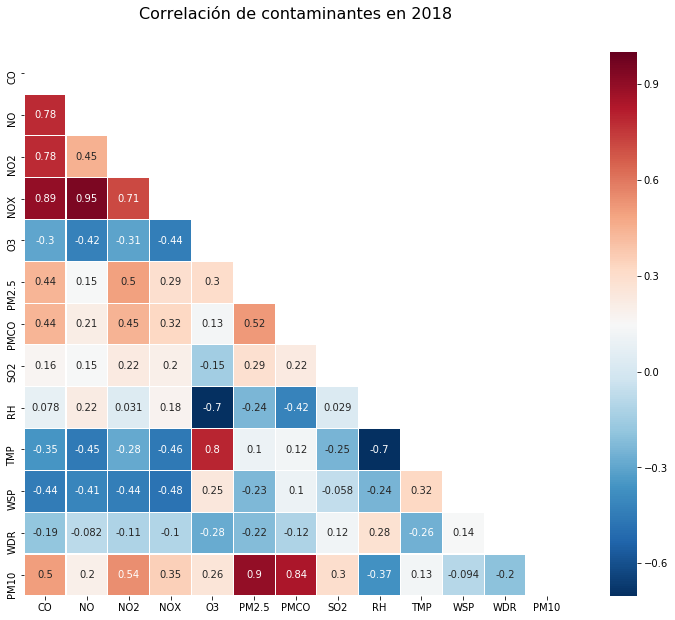

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu_r
plt.figure(figsize=(15,10))
plt.title(u'Correlación de contaminantes en 2018', y=1.05, size=16)

mask = np.zeros_like(matriz_total.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(matriz_total.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

## Cada 24 hrs

In [17]:
data_18_2 = pd.read_csv("merge_cont_2018.csv")

In [18]:
estaciones = ['MGH', 'HGM', 'TLA']
data_18_2 = data_18_2[(data_18_2.id_station.isin(estaciones))]

In [19]:
del data_18_2['Unnamed: 0']

In [20]:
del data_18_2['month']

In [21]:
del data_18_2['hour']

In [22]:
data_18_2['date'] = pd.DatetimeIndex(data_18_2.date).normalize()
data_18_2.head()

,date,id_station,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
1,2018-01-01,HGM,0.8,1.0,33.0,34.0,12.0,67.0,32.0,9.0,45.0,14.0,2.2,275.0,99.0
2,2018-01-01,MGH,0.5,1.0,21.0,23.0,24.0,72.0,22.0,9.0,47.0,13.2,2.5,333.0,94.0
5,2018-01-01,TLA,0.4,2.0,28.0,30.0,16.0,70.0,36.0,9.0,47.0,12.8,3.3,323.0,106.0
8,2018-01-01,HGM,0.6,1.0,28.0,29.0,16.0,68.0,28.0,10.0,46.0,13.2,2.7,264.0,96.0
9,2018-01-01,MGH,0.3,1.0,15.0,16.0,29.0,70.0,21.0,8.0,49.0,12.6,2.5,335.0,91.0


In [23]:
est_prom_24hrs = data_18_2.groupby('date').mean()

In [24]:
est_prom_24hrs = est_prom_24hrs.round(1)
est_prom_24hrs.head()

,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
date,,,,,,,,,,,,,
2018-01-01,0.4,5.1,21.2,26.4,26.2,48.2,18.2,25.1,51.5,12.7,2.6,281.7,66.4
2018-01-02,0.8,30.3,35.2,65.5,19.7,26.3,19.7,5.4,52.1,13.0,1.2,203.8,45.9
2018-01-03,0.8,33.6,40.2,73.7,24.8,37.7,30.0,14.8,45.6,14.9,1.6,184.8,67.6
2018-01-04,0.9,40.3,47.1,87.4,21.0,46.8,30.0,34.4,51.8,13.4,1.4,172.7,76.9
2018-01-05,0.8,30.5,37.9,68.6,36.2,40.4,29.2,7.4,40.7,17.3,1.7,138.4,69.6


In [25]:
matriz_total_24 = df_derived_by_shift(est_prom_24hrs, 0, NON_DER)
matriz_total_24.head()

,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
date,,,,,,,,,,,,,
2018-01-01,0.4,5.1,21.2,26.4,26.2,48.2,18.2,25.1,51.5,12.7,2.6,281.7,66.4
2018-01-02,0.8,30.3,35.2,65.5,19.7,26.3,19.7,5.4,52.1,13.0,1.2,203.8,45.9
2018-01-03,0.8,33.6,40.2,73.7,24.8,37.7,30.0,14.8,45.6,14.9,1.6,184.8,67.6
2018-01-04,0.9,40.3,47.1,87.4,21.0,46.8,30.0,34.4,51.8,13.4,1.4,172.7,76.9
2018-01-05,0.8,30.5,37.9,68.6,36.2,40.4,29.2,7.4,40.7,17.3,1.7,138.4,69.6


In [26]:
matriz_total_24.corr()

,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
CO,1.000000,0.804041,0.879000,0.898916,-0.235923,0.643477,0.620451,0.292263,-0.190593,-0.468123,-0.536826,-0.262780,0.713073
NO,0.804041,1.000000,0.716029,0.951793,-0.354658,0.386334,0.565585,0.266384,-0.229121,-0.395595,-0.385928,-0.197008,0.529939
NO2,0.879000,0.716029,1.000000,0.895513,-0.126433,0.704781,0.612174,0.315668,-0.225804,-0.354415,-0.593783,-0.259729,0.745430
NOX,0.898916,0.951793,0.895513,1.000000,-0.281753,0.555875,0.630672,0.309129,-0.247584,-0.407731,-0.505346,-0.239261,0.665916
O3,-0.235923,-0.354658,-0.126433,-0.281753,1.000000,0.157588,0.063706,-0.087266,-0.473128,0.638894,0.037816,-0.288238,0.128203
PM2.5,0.643477,0.386334,0.704781,0.555875,0.157588,1.000000,0.572559,0.515899,-0.139228,-0.242916,-0.407388,-0.168403,0.901577
PMCO,0.620451,0.565585,0.612174,0.630672,0.063706,0.572559,1.000000,0.413024,-0.549653,-0.159400,-0.057247,-0.066638,0.870861
SO2,0.292263,0.266384,0.315668,0.309129,-0.087266,0.515899,0.413024,1.000000,-0.160488,-0.356268,0.008071,0.121345,0.527102
RH,-0.190593,-0.229121,-0.225804,-0.247584,-0.473128,-0.139228,-0.549653,-0.160488,1.000000,-0.318745,-0.061112,0.335821,-0.373279
TMP,-0.468123,-0.395595,-0.354415,-0.407731,0.638894,-0.242916,-0.159400,-0.356268,-0.318745,1.000000,0.137184,-0.236485,-0.229678


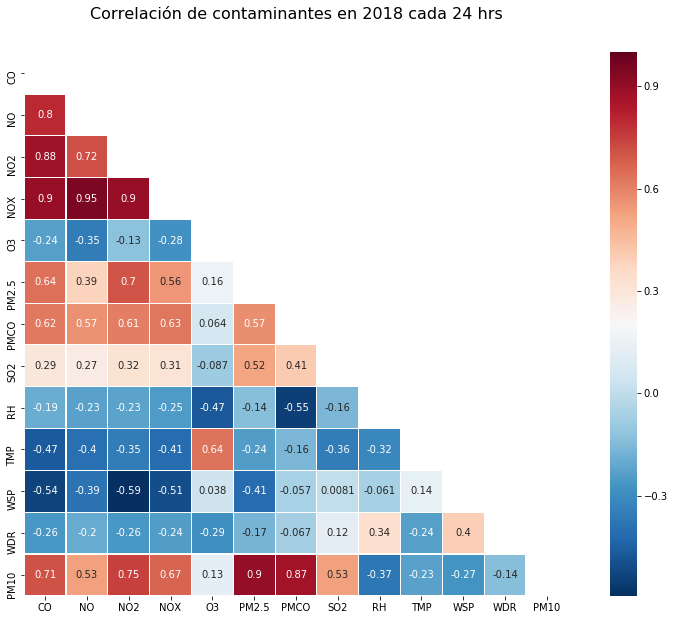

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu_r
plt.figure(figsize=(15,10))
plt.title(u'Correlación de contaminantes en 2018 cada 24 hrs', y=1.05, size=16)

mask = np.zeros_like(matriz_total_24.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(matriz_total_24.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# Cada 12 hrs

In [28]:
data_18_3 = pd.read_csv("merge_cont_2018.csv")

In [29]:
estaciones = ['MGH', 'HGM', 'TLA']
data_18_3 = data_18_3[(data_18_3.id_station.isin(estaciones))]

In [30]:
del data_18_3['Unnamed: 0']

In [31]:
del data_18_3['month']

In [32]:
del data_18_3['hour']

In [33]:
data_18_3.head()

,date,id_station,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
1,2018-01-01 01:00:00,HGM,0.8,1.0,33.0,34.0,12.0,67.0,32.0,9.0,45.0,14.0,2.2,275.0,99.0
2,2018-01-01 01:00:00,MGH,0.5,1.0,21.0,23.0,24.0,72.0,22.0,9.0,47.0,13.2,2.5,333.0,94.0
5,2018-01-01 01:00:00,TLA,0.4,2.0,28.0,30.0,16.0,70.0,36.0,9.0,47.0,12.8,3.3,323.0,106.0
8,2018-01-01 02:00:00,HGM,0.6,1.0,28.0,29.0,16.0,68.0,28.0,10.0,46.0,13.2,2.7,264.0,96.0
9,2018-01-01 02:00:00,MGH,0.3,1.0,15.0,16.0,29.0,70.0,21.0,8.0,49.0,12.6,2.5,335.0,91.0


In [36]:
data_18_3['date'] =  pd.to_datetime(data_18_3['date'], format='%Y-%m-%d %H:%M:%S')

In [43]:
def cada_12(df,fecha):
    if df['fecha'].dt.hour >= 0 & df['fecha'].dt.hour < 12:
        valor = 'AM' 
    elif df['fecha'].dt.hour >= 12 & df['fecha'].dt.hour <= 23:
        valor = 'PM'
    else:
        valor = 'indefinido'
    return valor

In [50]:
valores = {0 : 'AM', 1: 'AM', 2: 'AM', 3: 'AM', 4: 'AM', 5: 'AM', 6: 'AM', 7:'AM', 8:'AM', 9: 'AM', 10:'AM'
          , 11: 'AM', 12: 'PM', 13: 'PM', 14: 'PM', 15: 'PM', 16: 'PM', 17: 'PM', 18: 'PM', 19: 'PM', 20: 'PM'
          , 21: 'PM', 22: 'PM', 23: 'PM'}

In [53]:
data_18_3['hora'] = data_18_3['date'].dt.hour

In [59]:
data_18_3['indicador'] = data_18_3['hora'].map(valores)

In [62]:
del data_18_3['hora']

In [71]:
data_18_3['date'] = pd.DatetimeIndex(data_18_3.date).normalize()
data_18_3.head()

,date,id_station,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10,indicador
1,2018-01-01,HGM,0.8,1.0,33.0,34.0,12.0,67.0,32.0,9.0,45.0,14.0,2.2,275.0,99.0,AM
2,2018-01-01,MGH,0.5,1.0,21.0,23.0,24.0,72.0,22.0,9.0,47.0,13.2,2.5,333.0,94.0,AM
5,2018-01-01,TLA,0.4,2.0,28.0,30.0,16.0,70.0,36.0,9.0,47.0,12.8,3.3,323.0,106.0,AM
8,2018-01-01,HGM,0.6,1.0,28.0,29.0,16.0,68.0,28.0,10.0,46.0,13.2,2.7,264.0,96.0,AM
9,2018-01-01,MGH,0.3,1.0,15.0,16.0,29.0,70.0,21.0,8.0,49.0,12.6,2.5,335.0,91.0,AM


In [76]:
est_prom_12_test_3 = data_18_3.groupby(['indicador','date']).mean()

In [77]:
est_prom_12_test_3 = est_prom_12_test_3.round(1)
est_prom_12_test_3.head(10)

CO     NO   NO2    NOX    O3  PM2.5  PMCO   SO2    RH  \
indicador date                                                                 
AM        2018-01-01  0.5    7.2  26.0   33.2  13.9   60.1  15.5  37.2  57.3   
          2018-01-02  0.7   39.4  29.0   68.3   5.6   17.6  14.3   6.7  67.3   
          2018-01-03  1.1   60.6  48.2  108.7   6.7   39.7  29.2  15.5  55.4   
          2018-01-04  1.0   61.6  45.2  106.8   3.7   41.6  24.5  39.2  63.0   
          2018-01-05  1.1   86.9  48.8  135.8   6.5   47.1  25.6  12.2  54.8   
          2018-01-06  1.0   60.8  42.9  103.7   8.3   32.0  25.7  10.6  55.9   
          2018-01-07  0.8   24.6  37.8   62.4   8.8   22.9  17.4   9.7  49.4   
          2018-01-08  1.7  100.5  60.4  160.9   7.0   44.3  32.2   4.8  49.2   
          2018-01-09  1.0   90.6  40.7  131.4   6.0   27.5  22.1  15.1  53.8   
          2018-01-10  1.4  115.5  54.8  170.3   4.4   28.3  31.9  16.5  33.3   

                       TMP  WSP    WDR  PM10  
indicador date                                
AM        2018-01-01  10.7  2.3  303.6  75.7  
          2018-01-02   9.2  1.1  216.8  31.9  
          2018-01-03  12.3  0.9  175.1  68.9  
          2018-01-04  10.1  1.2  187.6  66.2  
          2018-01-05  13.7  0.9  154.7  72.7  
          2018-01-06  11.5  1.0  190.7  57.8  
          2018-01-07  10.4  1.1  168.9  40.2  
          2018-01-08  12.1  1.1  157.5  76.4  
          2018-01-09   9.9  1.1  166.4  49.7  
          2018-01-10  10.0  1.0  199.5  60.1

In [78]:
matriz_total_test_12 = df_derived_by_shift(est_prom_12_test_3, 0, NON_DER)
matriz_total_test_12.head()

CO    NO   NO2    NOX    O3  PM2.5  PMCO   SO2    RH  \
indicador date                                                                
AM        2018-01-01  0.5   7.2  26.0   33.2  13.9   60.1  15.5  37.2  57.3   
          2018-01-02  0.7  39.4  29.0   68.3   5.6   17.6  14.3   6.7  67.3   
          2018-01-03  1.1  60.6  48.2  108.7   6.7   39.7  29.2  15.5  55.4   
          2018-01-04  1.0  61.6  45.2  106.8   3.7   41.6  24.5  39.2  63.0   
          2018-01-05  1.1  86.9  48.8  135.8   6.5   47.1  25.6  12.2  54.8   

                       TMP  WSP    WDR  PM10  
indicador date                                
AM        2018-01-01  10.7  2.3  303.6  75.7  
          2018-01-02   9.2  1.1  216.8  31.9  
          2018-01-03  12.3  0.9  175.1  68.9  
          2018-01-04  10.1  1.2  187.6  66.2  
          2018-01-05  13.7  0.9  154.7  72.7

In [79]:
matriz_total_test_12.corr()

,CO,NO,NO2,NOX,O3,PM2.5,PMCO,SO2,RH,TMP,WSP,WDR,PM10
CO,1.000000,0.765939,0.849142,0.882964,-0.409658,0.543505,0.455387,0.256716,0.086981,-0.518757,-0.610434,-0.194628,0.569220
NO,0.765939,1.000000,0.564700,0.953339,-0.668285,0.146782,0.208209,0.251720,0.289035,-0.653599,-0.605314,-0.025701,0.198295
NO2,0.849142,0.564700,1.000000,0.787420,-0.284766,0.640068,0.479738,0.275600,-0.015340,-0.367081,-0.601763,-0.175600,0.640548
NOX,0.882964,0.953339,0.787420,1.000000,-0.602904,0.344024,0.332283,0.289156,0.208515,-0.622103,-0.671358,-0.083597,0.383244
O3,-0.409658,-0.668285,-0.284766,-0.602904,1.000000,0.183923,0.186528,-0.213886,-0.684091,0.814547,0.521605,-0.252372,0.209688
PM2.5,0.543505,0.146782,0.640068,0.344024,0.183923,1.000000,0.557929,0.404849,-0.167471,-0.051891,-0.243901,-0.156094,0.901046
PMCO,0.455387,0.208209,0.479738,0.332283,0.186528,0.557929,1.000000,0.279838,-0.526470,0.075492,0.079059,-0.106728,0.862606
SO2,0.256716,0.251720,0.275600,0.289156,-0.213886,0.404849,0.279838,1.000000,0.036225,-0.358540,-0.103284,0.187716,0.392774
RH,0.086981,0.289035,-0.015340,0.208515,-0.684091,-0.167471,-0.526470,0.036225,1.000000,-0.620643,-0.402246,0.328771,-0.377023
TMP,-0.518757,-0.653599,-0.367081,-0.622103,0.814547,-0.051891,0.075492,-0.358540,-0.620643,1.000000,0.500330,-0.265511,0.008111


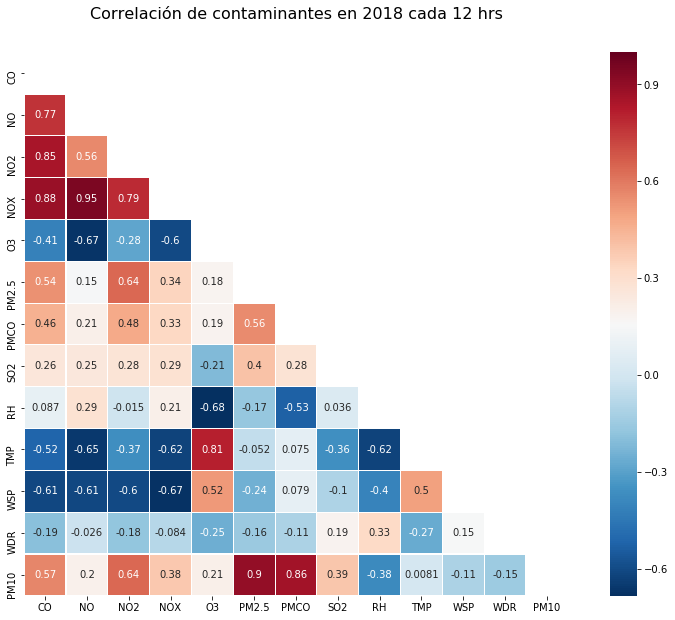

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu_r
plt.figure(figsize=(15,10))
plt.title(u'Correlación de contaminantes en 2018 cada 12 hrs', y=1.05, size=16)

mask = np.zeros_like(matriz_total_test_12.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(matriz_total_test_12.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
# Función para hacer el lag

def df_derived_by_shift_12(df,lag=0,NON_DER=[]):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
    return df